## Step 4: GRADIENT DESCENT IN CODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data = [(1, 3), (3, 6)]
n = len(data)
n

2

In [3]:
# Initial values
m = -1.0
b = 1.0
alpha = 0.1
iterations = 4

In [4]:
def predict(x, m, b):
    """Compute predicted value."""
    return m * x + b

In [5]:
def compute_gradients(data, m, b):
    """Compute gradients using assignment formula."""
    grad_m = 0
    grad_b = 0
    for x, y in data:
        error = y - predict(x, m, b)
        grad_m += error * x
        grad_b += error
    grad_m = - (2 / n) * grad_m
    grad_b = - (2 / n) * grad_b
    return grad_m, grad_b

In [6]:
def compute_mse(data, m, b):
    """Compute mean squared error."""
    total_error = 0
    for x, y in data:
        total_error += (y - predict(x, m, b)) ** 2
    return total_error / n


In [7]:
def gradient_descent(data, m, b, alpha, iterations):
    """Perform gradient descent for specified iterations."""
    m_history = [m]
    b_history = [b]
    error_history = []

    for i in range(iterations):
        grad_m, grad_b = compute_gradients(data, m, b)
        m -= alpha * grad_m
        b -= alpha * grad_b
        mse = compute_mse(data, m, b)

        m_history.append(m)
        b_history.append(b)
        error_history.append(mse)

        print(f"Iteration {i+1}: m = {m:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

    return m, b, m_history, b_history, error_history

m, b, m_vals, b_vals, error_vals = gradient_descent(data, m, b, alpha, iterations)



Iteration 1: m = 1.7000, b = 2.1000, MSE = 1.0400
Iteration 2: m = 1.2600, b = 1.9000, MSE = 0.0640
Iteration 3: m = 1.3400, b = 1.9160, MSE = 0.0348
Iteration 4: m = 1.3336, b = 1.8968, MSE = 0.0318


In [8]:
# Final Predictions
print("\nFinal Predictions:")
for x, _ in data:
    print(f"x = {x}, predicted y = {predict(x, m, b):.4f}")


Final Predictions:
x = 1, predicted y = 3.2304
x = 3, predicted y = 5.8976


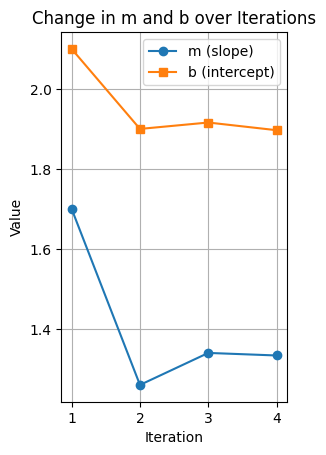

In [9]:
# m and b plot
plt.subplot(1, 2, 1)
plt.plot(range(1, iterations + 1), m_vals[1:], label='m (slope)', marker='o')
plt.plot(range(1, iterations + 1), b_vals[1:], label='b (intercept)', marker='s')
plt.title("Change in m and b over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.grid(True)
plt.legend()

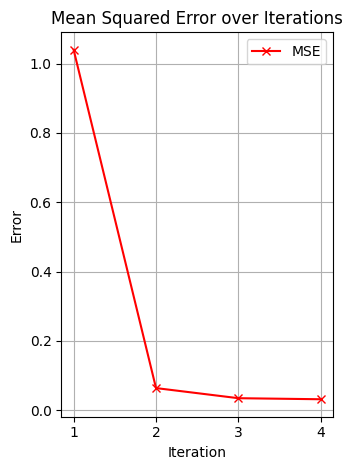

In [10]:
# Error plot
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), error_vals, label='MSE', marker='x', color='red')
plt.title("Mean Squared Error over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()